<a href="https://colab.research.google.com/github/LeNoRaV/MathStat/blob/main/%D0%94%D0%B78.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

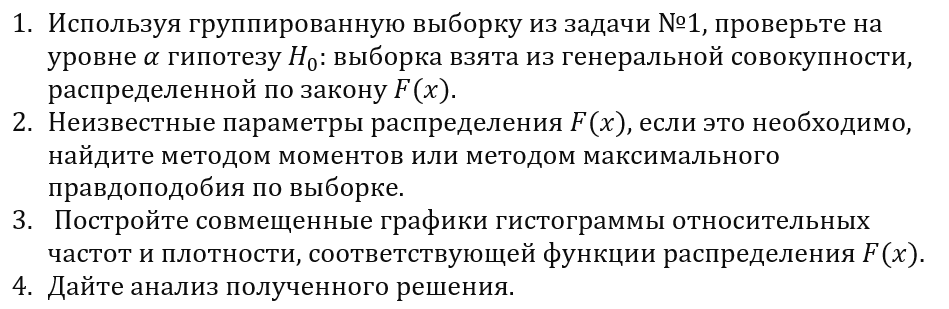

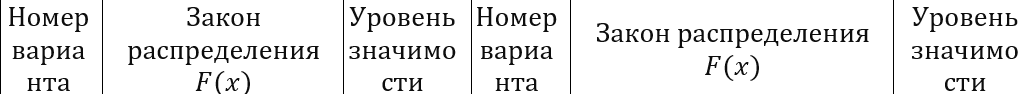

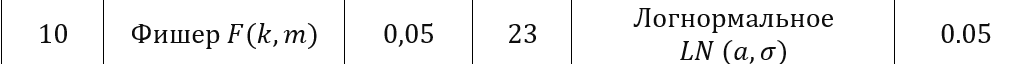

In [ ]:
lmbd=0.05

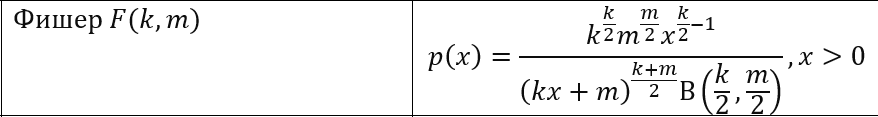

In [ ]:
df = pd.read_csv('ДЗ8.csv',delimiter=';',header=None)
x = df.to_numpy()
print("Выборка (вариант 10) \n", x)

Выборка (вариант 10) 
 [[2.198 1.386 0.686 2.143 0.463 1.008 0.219 1.18  2.646 1.689 0.896 0.411]
 [0.729 2.711 0.05  1.569 0.792 1.983 0.43  1.535 3.198 0.099 0.457 0.863]
 [0.152 1.554 3.92  0.197 0.439 0.566 3.286 0.386 0.324 0.122 1.63  3.203]
 [0.646 0.771 1.708 0.382 0.33  0.879 2.006 0.365 0.108 2.383 0.386 0.607]
 [0.462 1.819 0.231 0.804 0.641 1.578 0.724 1.528 0.133 3.033 2.775 0.009]
 [1.986 0.263 0.785 1.769 0.094 3.039 1.397 1.656 0.915 3.609 0.099 0.575]
 [0.961 0.002 2.238 1.8   0.802 0.601 0.498 1.094 0.233 0.111 0.94  1.33 ]
 [0.237 0.165 0.805 0.167 0.656 1.492 1.59  1.026 0.104 1.177 0.671 0.614]
 [0.037 0.373 1.17  0.703 1.125 0.975 0.216 2.154 0.936 1.616 0.262 1.172]
 [0.177 0.974 2.182 0.057 2.146 0.381 0.239 0.299 0.616 0.957 0.057 1.471]]


In [ ]:
n = x.size
Max = np.amax(x)
Min = np.amin(x)
w = Max - Min

print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Размер n = 120
Крайние члены вариационного ряда max = 3.920, min = 0.00230
Размах выборки w = 3.917699


In [ ]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(x, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 0.559671


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|           0.28213664285714285           |                        43.0                        |
|            0.8418079285714286           |                        33.0                        |
|            1.4014792142857142           |                        19.0                        |
|                1.9611505                |                        14.0                        |
|            2.520821785714286            |                        4.0                         |
|            3.080493071428571            |                        5.0                         |
|            3.640164357142857            |           

In [ ]:
sum=0
for i in range(0,10):
  for j in range(0,12):
    sum+=x[i][j]
xm=1/n*sum
print("Выброчное среднее xm =", round(xm, 5))

sum=0
for i in range(0,10):
  for j in range(0,12):
    sum+=(xm-x[i][j])**2
s2=1/(n-1)*sum
print("Выборочная дисперсия s2 =", round(s2, 5))

Выброчное среднее xm = 1.04353
Выборочная дисперсия s2 = 0.80027


In [ ]:
lam=1/xm
print("lambda =", round(lam, 5))

lambda = 0.95828


In [ ]:
f_m=2*xm/(xm-1)
print("f_m =", round(f_m, 5))

#f_k=(f_m-2)/((s2*(f_m-4)*(f_m-2)**2)/(2*f_m**2)-1)
f_k=(2*f_m**2*(f_m-2))/(s2*(f_m-4)*(f_m-2)**2-2*f_m**2)
print("f_k =", round(f_k, 5))

f_m = 47.94057
f_k = 3.03321


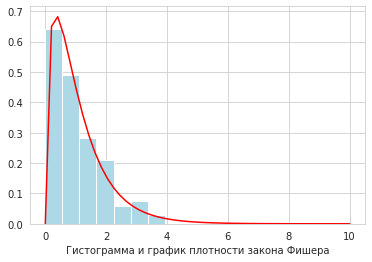

In [ ]:
from scipy.stats import f

sb.set_style("whitegrid")
ls = np.linspace(0,10)
pdf = f.pdf(ls, f_k,f_m,scale=xm)
plt.plot(ls, pdf, color='red')
plt.xlabel('Гистограмма и график плотности закона Фишера')
X = Int
Y = p / h
plt.bar(X, Y, width=h, color='lightblue')
plt.show()

In [ ]:
pk=[]
sum=0
pk.append(f.cdf(intl[1],f_k,f_m))
for i in range(1,6):
  pk.append(f.cdf(intl[i+1],f_k,f_m)-f.cdf(intl[i],f_k,f_m))
for j in range(0,6):
  sum+=pk[j]
pk.append(1-sum)
print(pk,4)
sum=0
for j in range(0,7):
  sum+=pk[j]
print(sum)

[0.3554085400428956, 0.29458364209110316, 0.1669714478521782, 0.08815087382564613, 0.04557504913231469, 0.02348621168947107, 0.025824235366391113] 4
1.0


In [ ]:
v=[]
for j in range(0,l):
  v.append(pk[j]*n)
print(v)

[42.64902480514748, 35.35003705093238, 20.036573742261385, 10.578104859077534, 5.469005895877763, 2.8183454027365284, 3.0989082439669335]


In [ ]:
chisq=sp.stats.chi2.ppf(1-lmbd, 2)
print(chisq)

5.991464547107979


In [ ]:
chisq_v=0
for i in range(0,4):
  chisq_v+=((f2[i]-v[i])**2)/(v[i])
  print(f2[i])
chisq_v+=((f2[4]+f2[5]+f2[6]-v[4]-v[5]-v[6])**2)/(v[4]+v[5]+v[6])
print(chisq_v)

43
33
19
14
1.3327896253404736
